In [14]:
path_aggregated_perf_table = "../datasets/2023-01-01_benchmark_processed_data/2023-01-27_FullTableAurocFiltered.tsv"
path_output_dir = "./"
export = True


# Imports

/home/lambertmoy/projects/Benchmark-RBP/analyses/code/figure_layouts.py:98: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


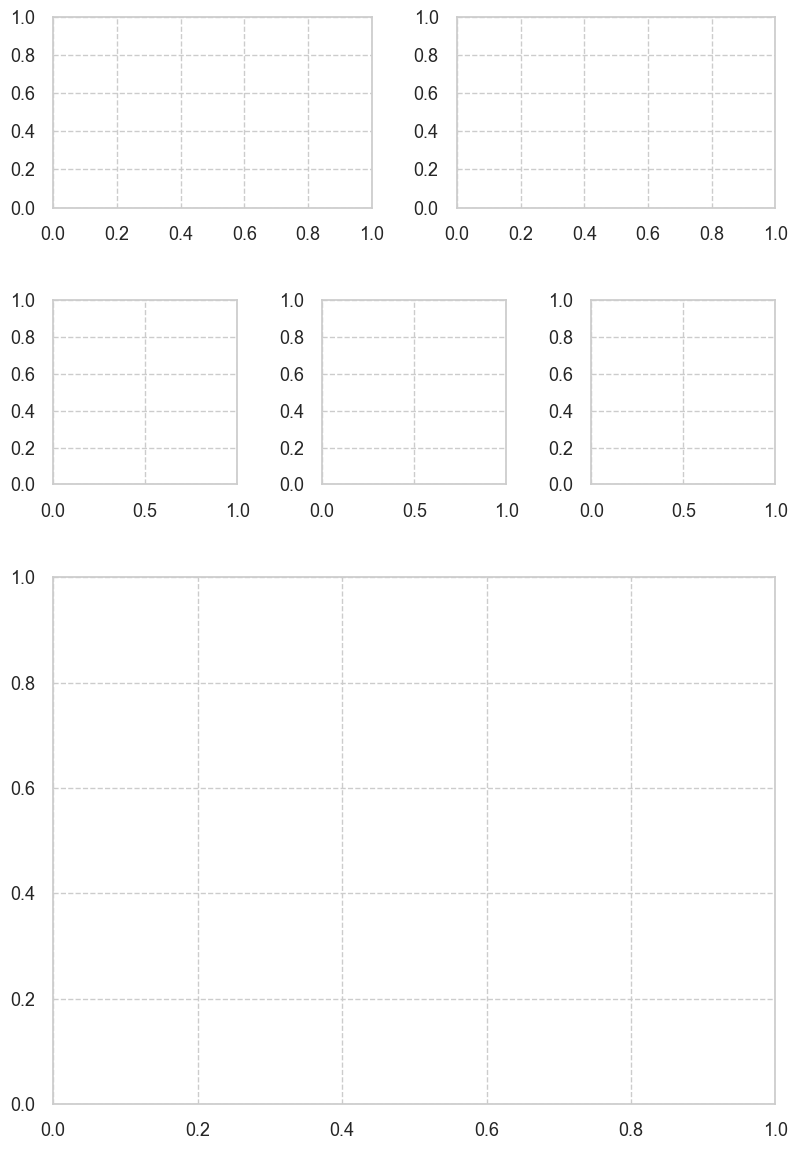

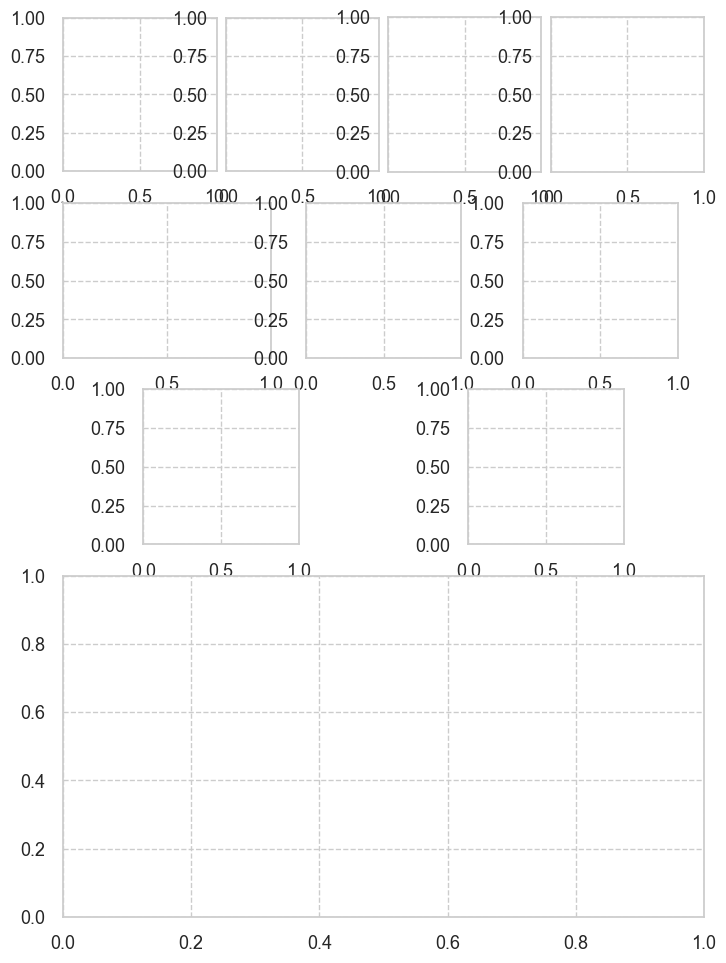

In [1]:
import os
import sys
from pathlib import Path

import pandas as pd
import polars as pl
import numpy as np
import yaml
import scipy.stats

from dotmap import DotMap


path = "../code/"
if not str(path) in sys.path:
    sys.path.insert(0, str(path))

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from plotting_config import *

%run "../code/plotting_config.py"
%run "../code/figure_layouts.py"

# Generate

In [3]:
df = pd.read_csv(path_aggregated_perf_table, header=0, index_col=None, sep="\t")
df.head(3)


,auroc,arch,dataset,RBP_dataset,fold,model_negativeset,sample_negset,unique_id,cts,pred.min,...,pc_min.pos,pc_max.neg,pc_max.pos,pc_avg.neg,pc_avg.pos,cm.tn,cm.fp,cm.fn,cm.tp,cm.thresh
0,0.816722,GraphProt,ENCODE,AARS_K562,0,negative-1,negative-1,0,1164.0,-2.32555,...,-2.16176,2.44432,2.78082,-0.622877,0.534087,0.396048,0.103952,0.143471,0.356529,-0.044395
1,0.720094,GraphProt,ENCODE,AARS_K562,0,negative-2,negative-2,1,1164.0,-2.23113,...,-2.10945,1.77512,2.20583,-0.386235,0.215910,0.343643,0.156357,0.174399,0.325601,-0.085162
2,0.869781,GraphProt,ENCODE,AATF_K562,0,negative-1,negative-1,2,1954.0,-2.76148,...,-1.88693,2.18149,3.00107,-0.761631,0.885812,0.417605,0.082395,0.134084,0.365916,0.062090


In [10]:
df.loc[lambda df: df["dataset"].str.contains("PAR")]


,auroc,arch,dataset,RBP_dataset,fold,model_negativeset,sample_negset,unique_id,cts,pred.min,...,pc_min.pos,pc_max.neg,pc_max.pos,pc_avg.neg,pc_avg.pos,cm.tn,cm.fp,cm.fn,cm.tp,cm.thresh
446,0.683466,GraphProt,Mukherjee-PAR-CLIP,AGO1_HEK293_PARCLIP,0,negative-1,negative-1,446,19950.0,-2.406720,...,-1.637410,1.751080,1.647120,0.039428,0.358602,0.295388,0.204612,0.164211,0.335789,0.199015
447,0.576197,GraphProt,Mukherjee-PAR-CLIP,AGO1_HEK293_PARCLIP,0,negative-2,negative-2,447,19950.0,-2.184600,...,-1.552710,1.298560,1.308760,0.079508,0.229747,0.268922,0.231078,0.213985,0.286015,0.154628
448,0.684076,GraphProt,Mukherjee-PAR-CLIP,AGO2_HEK293_PARCLIP,0,negative-1,negative-1,448,17864.0,-2.598400,...,-1.851800,1.721270,1.756930,-0.117222,0.313201,0.293831,0.206169,0.164969,0.335031,0.097990
449,0.591578,GraphProt,Mukherjee-PAR-CLIP,AGO2_HEK293_PARCLIP,0,negative-2,negative-2,449,17864.0,-1.533780,...,-1.533780,1.445520,1.523130,0.072240,0.245635,0.256885,0.243115,0.193350,0.306650,0.158938
450,0.707545,GraphProt,Mukherjee-PAR-CLIP,AGO3_HEK293_PARCLIP,0,negative-1,negative-1,450,3128.0,-1.958750,...,-1.481820,1.551370,1.681570,-0.081675,0.296375,0.318414,0.181586,0.165921,0.334079,0.107350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6215,0.743785,Pysster-101,Mukherjee-PAR-CLIP,UPF1_HEK293_PARCLIP,0,negative-2,negative-2,6327,878.0,0.063615,...,0.100439,0.987616,0.990000,0.482017,0.714789,0.338269,0.161731,0.146925,0.353075,0.598403
6216,0.840030,Pysster-101,Mukherjee-PAR-CLIP,XPO5_HEK293_PARCLIP,0,negative-1,negative-1,6328,2462.0,0.000035,...,0.001863,0.999340,0.999983,0.331271,0.775131,0.356621,0.143379,0.108855,0.391145,0.553201
6217,0.808530,Pysster-101,Mukherjee-PAR-CLIP,XPO5_HEK293_PARCLIP,0,negative-2,negative-2,6329,2462.0,0.000069,...,0.002918,0.996994,0.999252,0.354163,0.743561,0.347685,0.152315,0.113729,0.386271,0.548862
6218,0.966726,Pysster-101,Mukherjee-PAR-CLIP,ZFP36_HEK293_PARCLIP,0,negative-1,negative-1,6330,648.0,0.001410,...,0.023041,0.994407,0.999972,0.141882,0.896110,0.462963,0.037037,0.044753,0.455247,0.518996


In [4]:
metadata_ionmf = {
    "AGO1234_UNKNOWN_PARCLIP_1": "AGO1234_HEK293_PARCLIP_1",
    "AGO2MNASE_UNKNOWN_PARCLIP_2": "AGO2MNASE_HEK293_PARCLIP_2",
    "Ago2_UNKNOWN_HITSCLIP_3": "Ago2_HEK293_HITSCLIP_3",
    "Ago2_UNKNOWN_HITSCLIP_4": "Ago2_HEK293_HITSCLIP_4",
    "AGO2_UNKNOWN_CLIPSEQ_5": "AGO2_HEK293_CLIPSEQ_5",
    "eIF4AIII_UNKNOWN_CLIPSEQ_6": "eIF4AIII_HeLa_CLIPSEQ_6",
    "eIF4AIII_UNKNOWN_CLIPSEQ_7": "eIF4AIII_HeLa_CLIPSEQ_7",
    "ELAVL1_UNKNOWN_PARCLIP_8": "ELAVL1_HEK293_PARCLIP_8",
    "ELAVL1MNASE_UNKNOWN_PARCLIP_9": "ELAVL1MNASE_HEK293_PARCLIP_9",
    "ELAVL1A_UNKNOWN_PARCLIP_10": "ELAVL1A_HEK293_PARCLIP_10",
    "ELAVL1_UNKNOWN_CLIPSEQ_11": "ELAVL1_HEK293_CLIPSEQ_11",
    "EWSR1_UNKNOWN_PARCLIP_12": "EWSR1_HEK293_PARCLIP_12",
    "FUS_UNKNOWN_PARCLIP_13": "FUS_HEK293_PARCLIP_13",
    "FUS_UNKNOWN_PARCLIP_14": "FUS_HEK293_PARCLIP_14",
    "IGF2BP123_UNKNOWN_PARCLIP_15": "IGF2BP123_HEK293_PARCLIP_15",
    "hnRNPC_UNKNOWN_ICLIP_16": "hnRNPC_HeLa_ICLIP_16",
    "hnRNPC_UNKNOWN_ICLIP_17": "hnRNPC_HeLa_ICLIP_17",
    "hnRNPL_UNKNOWN_ICLIP_18": "hnRNPL_HeLa_ICLIP_18",
    "hnRNP_UNKNOWN_ICLIP_19": "hnRNP_U266_ICLIP_19",
    "hnRNPlike_UNKNOWN_ICLIP_20": "hnRNPlike_U266_ICLIP_20",
    "MOV10_UNKNOWN_PARCLIP_21": "MOV10_HEK293_PARCLIP_21",
    "NSUN2_UNKNOWN_ICLIP_22": "NSUN2_HEK293_ICLIP_22",
    "PUM2_UNKNOWN_PARCLIP_23": "PUM2_HEK293_PARCLIP_23",
    "QKI_UNKNOWN_PARCLIP_24": "QKI_HEK293_PARCLIP_24",
    "SFRS1_UNKNOWN_CLIPSEQ_25": "SFRS1_HEK293_CLIPSEQ_25",
    "TAF15_UNKNOWN_PARCLIP_26": "TAF15_HEK293_PARCLIP_26",
    "TDP43_UNKNOWN_ICLIP_27": "TDP43_HeLa_ICLIP_27",
    "TIA1_UNKNOWN_ICLIP_28": "TIA1_HeLa_ICLIP_28",
    "TIAL1_UNKNOWN_ICLIP_29": "TIAL1_HeLa_ICLIP_29",
    "U2AF65_UNKNOWN_ICLIP_30": "U2AF65_HeLa_ICLIP_30",
    "U2AF65_UNKNOWN_ICLIP_31": "U2AF65_HeLa_ICLIP_31",
}


In [12]:
metadata = df.loc[:, ["dataset", "RBP_dataset"]].drop_duplicates().copy()
metadata["RBP_dataset"] = metadata["RBP_dataset"].map(
    lambda v: metadata_ionmf.get(v, v)
)
metadata["RBP"] = metadata["RBP_dataset"].str.split("_", expand=True).iloc[:, 0].values

metadata["cell_type"] = (
    metadata["RBP_dataset"].str.split("_", expand=True).iloc[:, 1].values
)
metadata["protocol"] = (
    metadata["RBP_dataset"].str.split("_", expand=True).iloc[:, 2].values
)
metadata.loc[lambda df: (df["dataset"] == "ENCODE").astype(bool), "protocol"] = "eCLIP"

metadata.head(3)


,dataset,RBP_dataset,RBP,cell_type,protocol
0,ENCODE,AARS_K562,AARS,K562,eCLIP
2,ENCODE,AATF_K562,AATF,K562,eCLIP
4,ENCODE,ABCF1_K562,ABCF1,K562,eCLIP


In [13]:
metadata.sort_values(by=["RBP", "cell_type"])


,dataset,RBP_dataset,RBP,cell_type,protocol
0,ENCODE,AARS_K562,AARS,K562,eCLIP
2,ENCODE,AATF_K562,AATF,K562,eCLIP
4,ENCODE,ABCF1_K562,ABCF1,K562,eCLIP
6,ENCODE,AGGF1_HepG2,AGGF1,HepG2,eCLIP
8,ENCODE,AGGF1_K562,AGGF1,K562,eCLIP
...,...,...,...,...,...
600,iONMF,hnRNP_U266_ICLIP_19,hnRNP,U266,ICLIP
594,iONMF,hnRNPC_HeLa_ICLIP_16,hnRNPC,HeLa,ICLIP
596,iONMF,hnRNPC_HeLa_ICLIP_17,hnRNPC,HeLa,ICLIP
598,iONMF,hnRNPL_HeLa_ICLIP_18,hnRNPL,HeLa,ICLIP


In [17]:
metadata_final = metadata.sort_values(by=["RBP", "cell_type"]).drop(columns="RBP_dataset")

if export:
    output_fp = str(Path(path_output_dir) / "metadata_rbp_celltype_protocol.tsv")
    metadata_final.to_csv(output_fp, header=True, index=False, sep="\t")
